## Investigating the effect of Outliers to a model's accuracy 

This exercise compares how outliers affect Discriminative and Generative models 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression 
from sklearn.mixture import GaussianMixture

In [2]:
# random dataset
x1 = [2,3.5,3,4,5,5.5,7,8,9,10]
x2 = [3.5,3,5.5,3.5,1,4,0,1,2.5,1.5]
y = [1,1,1,1,0,1,0,0,0,0]

In [3]:
# Logistic Regression 

lr = LogisticRegression()
lr.fit(np.array(list(zip(x1,x2))),y)

LogisticRegression()

In [4]:
x_min,x_max = 1,11
y_min,y_max =-1,6

xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

In [5]:
z = lr.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

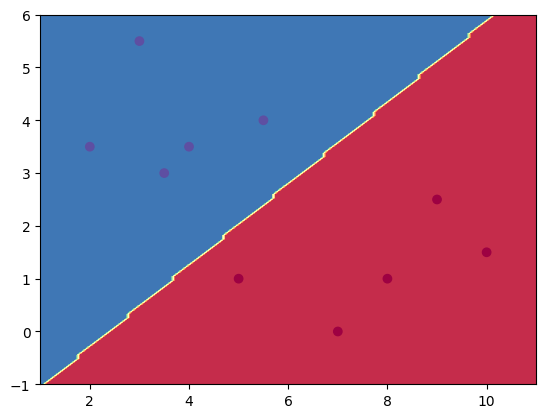

In [6]:
plt.contourf(xx,yy,z,cmap=plt.cm.Spectral)
plt.scatter(x1,x2,c=y,cmap=plt.cm.Spectral)
plt.show()

## Generative Model

In [19]:
gm = GaussianMixture(n_components=2)
gm.fit(np.array(list(zip(x1,x2))))

GaussianMixture(n_components=2)

In [20]:
aa,bb= np.meshgrid(np.linspace(0,12,500),np.linspace(0,6,500))

In [21]:
z0 = gm.predict_proba(np.c_[aa.ravel(),bb.ravel()])[:, 0]

z1 = gm.predict_proba(np.c_[aa.ravel(),bb.ravel()])[:, 1]

z0 = z0.reshape(aa.shape)
z1= z1.reshape(aa.shape)


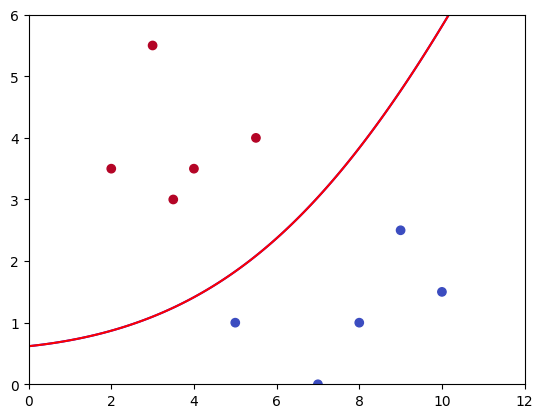

In [22]:
plt.contour(xx,yy,z0,levels=1,colors='blue')
plt.contour(xx,yy,z1,levels=1,colors='red')

plt.scatter(x1,x2,c=y,cmap='coolwarm')
plt.show()